# Chapter 2 Problems

#### Notebook setup

In [1]:
# load Python modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Problem: transformed variable

Consider the random variable $Y = \text{exp}(X)$,
where $X \sim \calN(\mu=0,\sigma=1)$,
which corresponds to `rvX = scipy.stats.norm(0,1)`.
 
a) Find the probability density function of `rvX`.

b) Use calculus to find the probability density function of $Y$.

c) Verify your answer in (b) by 10000 random samples from `rvX` and applying the `exp` transform on them.

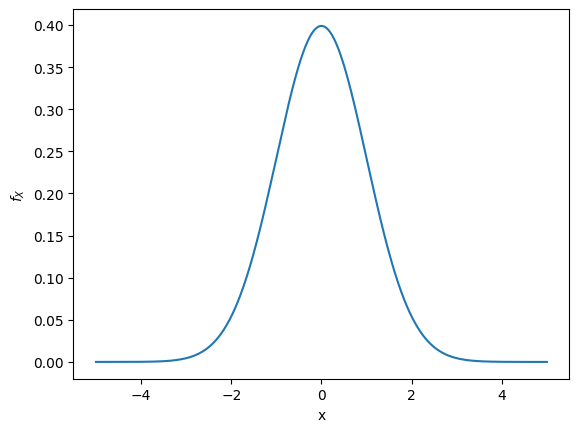

In [2]:
from scipy.stats import norm
from ministats import plot_pdf

rvX = norm(0,1)
plot_pdf(rvX, xlims=[-5,5]);

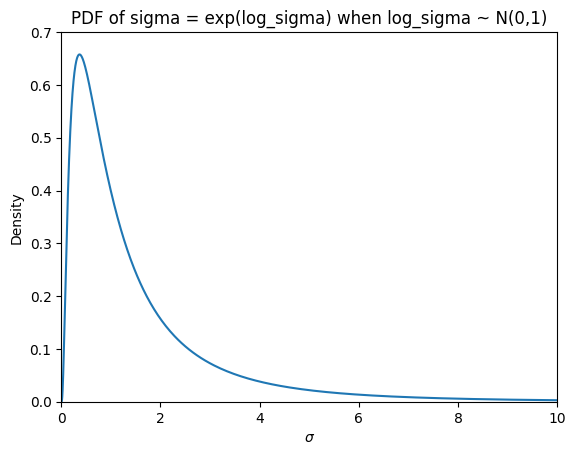

In [3]:
logsigs = np.linspace(-5, 5, 1000)
dlogsigs = norm(0,1).pdf(logsigs)
sigmas = np.exp(logsigs)
# Apply the change of variables to get the density for sigma
# based on the Jacobian adjustment |d(log(sigma))/d(sigma)| = 1/sigma
dsigmas = dlogsigs / sigmas  

# Plot the transformed density using seaborn
ax = sns.lineplot(x=sigmas, y=dsigmas)
ax.set_xlabel('$\\sigma$')
ax.set_ylabel('Density')
ax.set_title('PDF of sigma = exp(log_sigma) when log_sigma ~ N(0,1)')
ax.set_xlim(0, 10)
ax.set_ylim(0, 0.7);

(1.6513486244380393, 2.1603481268169995)

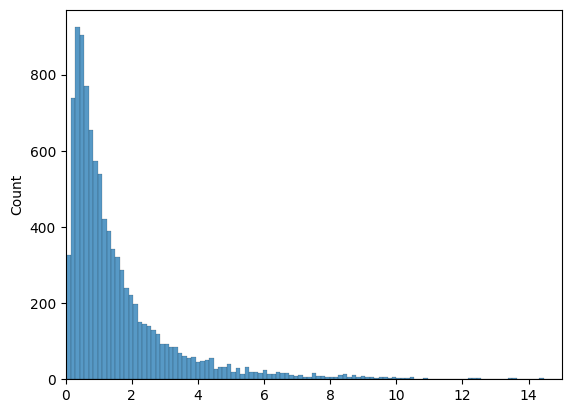

In [4]:
# verify using simulation
mu, sigma = 0, 1
N = 10000
np.random.seed(44)
logsigs = norm(mu, sigma).rvs(N)
sigs = np.exp(logsigs)
ax = sns.histplot(sigs)
ax.set_xlim(0, 15);
sigs.mean(), sigs.std(ddof=1)

### Problem {problem:pT-vs-pZ-in-left-tail}

In [29]:
from scipy.stats import norm
from scipy.stats import t as tdist

rvZ = norm(0,1)

for df in [28, 29, 30, 31, 58, 59, 60, 61]:
    rvT = tdist(df=df)
    pZ = rvZ.cdf(-2)
    pT = rvT.cdf(-2)
    print(f"{df=}  {pZ=:.5f}  {pT=:.5f}  percent diff. =", ((pT-pZ)/pZ*100).round(3) )

df=28  pZ=0.02275  pT=0.02764  percent diff. = 21.505
df=29  pZ=0.02275  pT=0.02747  percent diff. = 20.755
df=30  pZ=0.02275  pT=0.02731  percent diff. = 20.054
df=31  pZ=0.02275  pT=0.02716  percent diff. = 19.4
df=58  pZ=0.02275  pT=0.02510  percent diff. = 10.308
df=59  pZ=0.02275  pT=0.02506  percent diff. = 10.132
df=60  pZ=0.02275  pT=0.02502  percent diff. = 9.962
df=61  pZ=0.02275  pT=0.02498  percent diff. = 9.798


We see that for $\nu > 30$ the difference is less than 20\%,
and for $\nu > 60$ the differnece is less than 10\%.